# Films are they worse???
![](http://)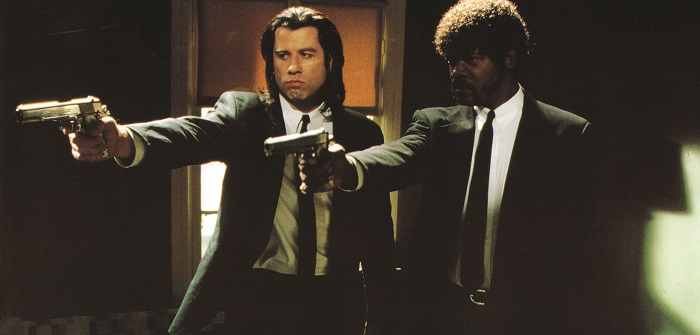
It was not that long ago, when i spoke with my friend and he said that music and films were better in 70-90s. I disagreed with him. I argued with bayes theorem: you know best 20 films from 10(20) year period and you know 300 from recent years, soo its logical that 20 films will have better overall quality and now i have opportunity to prove him that im right, soo its time to play with more that 25mil. reviews.
Part 1 is about that.
### Bonus 1-Are more popular multigenres films or singlegenres?
### Bonus 2- most popular genres
### Bonus 3 - Recognise genre by name(machine learning)



In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
movies_data = pd.read_csv('/kaggle/input/large-movie-dataset/movies_dataset.csv')
chceck_point1=movies_data
movies_data.shape
movies_data.head()

In [ ]:
movies_data['Year']=movies_data['Movie_Name'].str[-5:-1]##geting year from movie name 
movies_data.head()

In [ ]:
movies_data=movies_data[pd.to_numeric(movies_data['Year'], errors='coerce').notnull()]
movies_data['Year'] =movies_data['Year'].astype('int32')
movies_data = movies_data.drop(movies_data[(movies_data['Year'] == 6) | (movies_data['Year'] == 201)].index)## geting rid of unusefull data 

In [ ]:
movies_data.shape## we lost just uder 0.1 procent of data soo we dont need to wory about it

# evaluation
Well i must admit ,that i was wrong films are worse now acording to reviews. 
You can go with number of arguments, about Why is that the case. 
My main argumets are: 
   1. **Rise of TVshows**-which you can see on number of recent films reviews
   2. **Lack of evolution**(films are afraid to surprise audience-exception confirming the rule  *Joker(Joaquin Phoenix)-film succes and trubles are                              showing whats wrong with industry*)                                                                                                        
Second Reason is more my personal view its up to you to create your analysis.

In [ ]:
years = movies_data['Year'].drop_duplicates()


years = [Year for Year, df in movies_data.groupby(['Year'])]
plt.plot(years,movies_data.groupby(['Year']).count()['Rating'])
plt.ylabel('count(mil) ')
plt.xlabel('Year')
plt.show()

In [ ]:
years = [Year for Year, df in movies_data.groupby(['Year'])]
plt.plot(years,movies_data.groupby(['Year']).mean()['Rating'])
plt.ylabel('Rating ')
plt.xlabel('Year')
plt.show()

In [ ]:
genre_data=chceck_point1

# Bonus 1-Are more popular multigenres films or singlegenres?


In [ ]:
genres_types = ['Pure','Hybrid']
plt.bar(genres_types,[genre_data[~genre_data['Genre'].str.contains('|', regex=False, case=False, na=False)].count()['User_Id'],genre_data[genre_data['Genre'].str.contains('|', regex=False, case=False, na=False)].count()['User_Id']])
plt.ylabel('count(10 mil) ')
plt.xlabel('Genre type')
plt.show()


# Bonus 2- most popular genres
I was not that interested about gendre statistic, but if you are go for it(You can explore what genre was most filmed in which year...). I made here some basic graphs but there is much more to uncover....


In [ ]:
types=genre_data['Genre'].value_counts()[genre_data['Genre'].value_counts()>250000]##more than 1%-we will display just most rewied gesres
types=pd.DataFrame(types)
types['Genre'] = types.index
genre_reduced = pd.merge(types, genre_data, on="Genre")
Genre = [Genre for Genre, df in genre_reduced.groupby(['Genre'])]

In [ ]:
plt.bar(Genre,genre_reduced.groupby(['Genre']).count()['Rating'])
plt.xticks(Genre, rotation='vertical', size=10)
plt.ylabel('count(mil) ')
plt.xlabel('Genre type')
plt.show()


In [ ]:
plt.bar(Genre,genre_reduced.groupby(['Genre']).mean()['Rating'])
plt.xticks(Genre, rotation='vertical', size=10)
plt.ylabel('Rating')
plt.xlabel('Genre type')
plt.show()


# Bonus 3 - Recognise genre by name(machine learning)

In this bonus we will be trying to figue out if we can gues by name if genre is comedy or drama.

In [ ]:

genre_dat = genre_data.drop(genre_data[~((genre_data['Genre'] == 'Comedy') | (genre_data['Genre'] == 'Drama'))].index)
print(genre_dat.shape)
genre_dat.head()

res = genre_dat.drop_duplicates('Movie_Name')
print(res.shape)

In [ ]:
res.sample(frac=1)


In [ ]:
from sklearn.model_selection import train_test_split
training, test = train_test_split(res, test_size=0.18, random_state=42)

In [ ]:

train_x = training['Movie_Name'].to_list()
train_y = training['Genre'].to_list()


test_x = test['Movie_Name'].to_list()
test_y = test['Genre'].to_list()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer1 = TfidfVectorizer()
vectorizer = CountVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x)
test_x_vectors = vectorizer.transform(test_x)
train_x_vectors1 = vectorizer1.fit_transform(train_x)
test_x_vectors1 = vectorizer1.transform(test_x)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()
clf_log.fit(train_x_vectors, train_y)

clf_log1 = LogisticRegression()
clf_log1.fit(train_x_vectors1, train_y)



In [ ]:
from sklearn import svm

clf_svm = svm.SVC()
clf_svm.fit(train_x_vectors, train_y)

clf_svm1 = svm.SVC()
clf_svm1.fit(train_x_vectors1, train_y)

In [ ]:
print('CountVectorizer')
print(clf_log.score(test_x_vectors, test_y))
print(clf_svm.score(test_x_vectors, test_y))
from sklearn.metrics import f1_score

print(f1_score(test_y, clf_log.predict(test_x_vectors), average=None, labels=['Comedy', 'Drama']))
print(f1_score(test_y, clf_svm.predict(test_x_vectors), average=None, labels=['Comedy', 'Drama']))

print('TfidfVectorizer')


print(clf_log1.score(test_x_vectors1, test_y))
print(clf_svm1.score(test_x_vectors1, test_y))


print(f1_score(test_y, clf_log1.predict(test_x_vectors1), average=None, labels=['Comedy', 'Drama']))
print(f1_score(test_y, clf_svm1.predict(test_x_vectors1), average=None, labels=['Comedy', 'Drama']))

#### From data look like countvectrorizer and regresion is way to go we will make a grid search to chose what parammeters work best for it

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag'), 'C': (0.5,1,4,8,16,32),'class_weight': (dict , 'balanced', None)}

clf_logf = LogisticRegression()
clf = GridSearchCV(clf_logf, parameters, cv=5)
clf_logf.fit(train_x_vectors, train_y)

In [ ]:
print(clf_logf.score(test_x_vectors, test_y))
print(f1_score(test_y, clf_logf.predict(test_x_vectors), average=None, labels=['Comedy', 'Drama']))
result=clf_logf.score(test_x_vectors, test_y)

Sadly no chage looks like 68 procent is our best prediction
